## Applied Signal and Image Processing 

### Practical 1

(Subhashish Nabajja, CS24010)

**Aim**: Write program to demonstrate the following aspects of signal processing on suitable data
1. Upsampling and downsampling on Image/speech signal
2. Fast Fourier Transform to compute DFT

### Upsampling and downsampling on Image/speech singal

Upsampling and downsampling are fundamental signal processing techniques used to change the resolution or sampling rate of an image or a speech signal.

1. Downsampling:

    - Reduces the sampling rate or resolution of a signal.
    - In images, it involves reducing the number of pixels, resulting in a smaller image size. This is commonly done by averaging or skipping pixels.- In speech signals, it involves decreasing the sampling frequency (e.g., from 16 kHz to 8 kHz), often used to reduce data storage requirements or bandwidth.
    - Risks introducing aliasing if the signal is not properly filtered before downsampling.

2. Upsampling:
    - Increases the sampling rate or resolution of a signal.
    - In images, it involves interpolating new pixels to increase dimensions, resulting in a larger image size.
    - In speech signals, it involves increasing the sampling frequency (e.g., from 8 kHz to 16 kHz), often used for compatibility with high-quality audio systems.
    - Requires interpolation techniques (e.g., linear, cubic) to estimate intermediate values, which may introduce artifacts or reduce fidelity.

Applications include image processing, audio compression, and preparation for various machine learning models.




### Fast Fourier Transform to compute DFT

The **Fast Fourier Transform (FFT)** is an efficient algorithm to compute the **Discrete Fourier Transform (DFT)**, transforming signals from the time domain to the frequency domain.

- **DFT Basics**:
  - Analyzes frequency components of discrete signals.
  - Converts time-domain data into a frequency-domain representation.
  - Naive DFT computation has a complexity of \(O(N^2)\).

- **FFT Advantage**:
  - Reduces complexity to \(O(N \log N)\), making it faster for large signals.
  - Commonly implemented using the **Cooley-Tukey algorithm**.

- **Applications**:
  - **Speech signals**: Analyze pitch, tone, and frequencies for recognition or filtering.
  - **Images**: Filter noise, compress data, and analyze spatial frequencies.
  - **Communication systems**: Design filters, remove noise, and analyze signals.

The FFT is fundamental in signal processing, enabling efficient analysis and manipulation of signals in various domains.

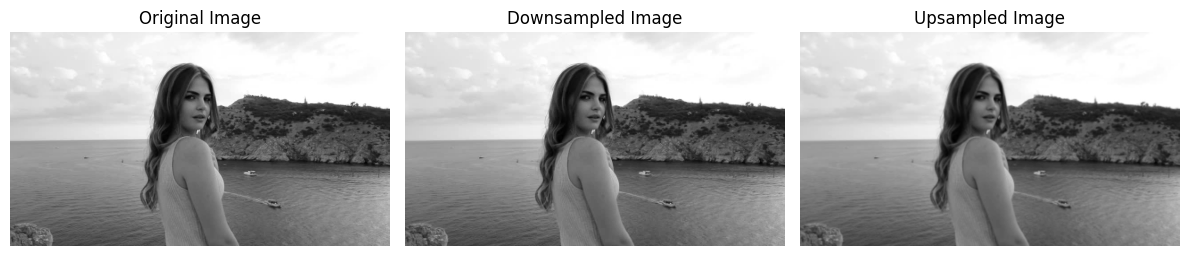

In [3]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('./assets/girl.jpg', cv2.IMREAD_GRAYSCALE)

# Downsample the image by 50% in both dimensions
downsampled_image = cv2.resize(image, None, fx=0.5, fy=0.5)

# Upsample back to the original dimensions
upsampled_image = cv2.resize(
    downsampled_image, 
    (image.shape[1], image.shape[0]), 
    interpolation=cv2.INTER_LINEAR
)

# Plot the images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Downsampled Image
plt.subplot(1, 3, 2)
plt.title("Downsampled Image")
plt.imshow(downsampled_image, cmap='gray')
plt.axis('off')

# Upsampled Image
plt.subplot(1, 3, 3)
plt.title("Upsampled Image")
plt.imshow(upsampled_image, cmap='gray')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

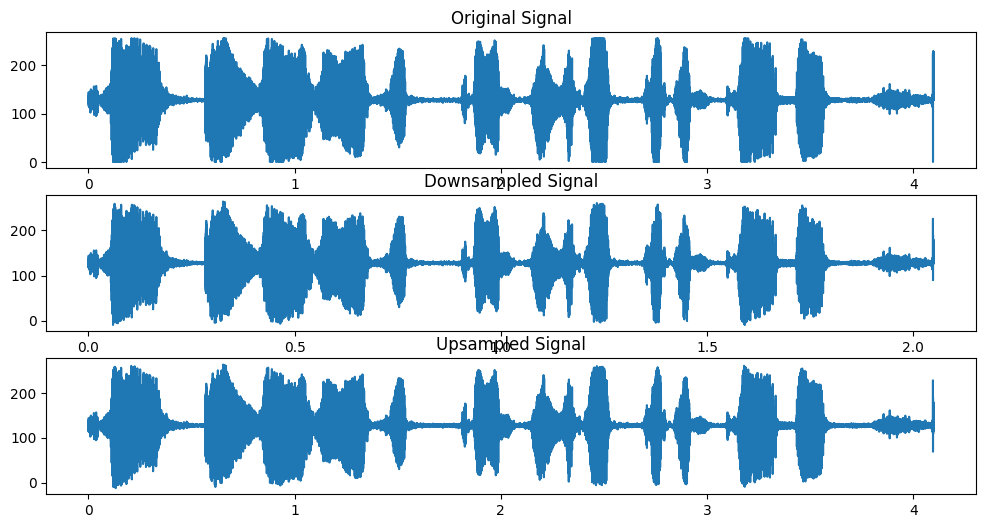

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample

sample_rate, audio_signal = wavfile.read('./assets/taunt.wav')
downsampled_signal = resample(audio_signal, len(audio_signal) //2 )
upsampled_signal = resample(downsampled_signal, len(audio_signal))
time_original = np.linspace(0, len(audio_signal) / sample_rate,
num=len(audio_signal))
time_downsampled = np.linspace(0, len(downsampled_signal) / sample_rate,
num=len(downsampled_signal))
time_upsampled = np.linspace(0, len(upsampled_signal) / sample_rate,
num=len(upsampled_signal))
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.title("Original Signal")
plt.plot(time_original, audio_signal)
plt.subplot(3,1,2)
plt.title("Downsampled Signal")
plt.plot(time_downsampled, downsampled_signal)
plt.subplot(3,1,3)
plt.title("Upsampled Signal")
plt.plot(time_upsampled, upsampled_signal)
plt.show()

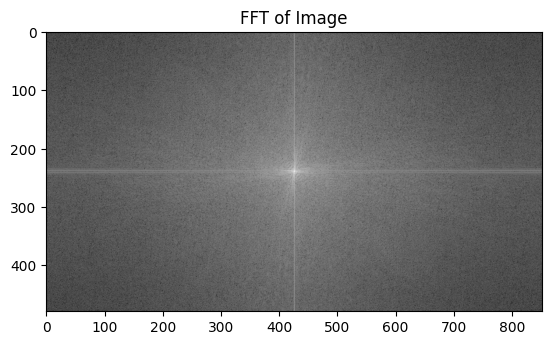

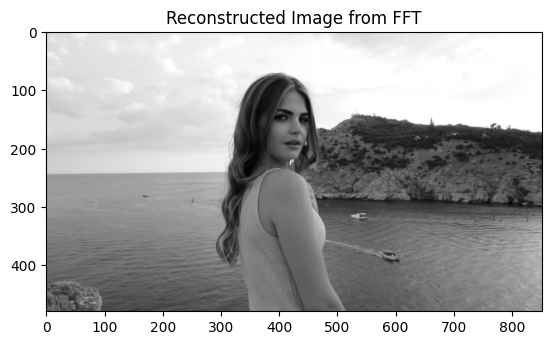

In [6]:
import numpy as np

fft_image = np.fft.fft2(image)
fft_image_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = 20 * np.log(np.abs(fft_image_shifted))

plt.figure()
plt.title("FFT of Image")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

ifft_image_shifted = np.fft.ifftshift(fft_image)
reconstructed_image = np.fft.ifft2(ifft_image_shifted)
reconstructed_image = np.abs(reconstructed_image)

plt.figure()
plt.title("Reconstructed Image from FFT")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

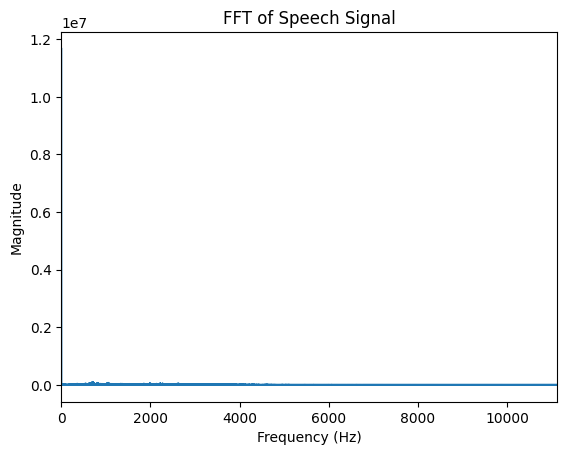

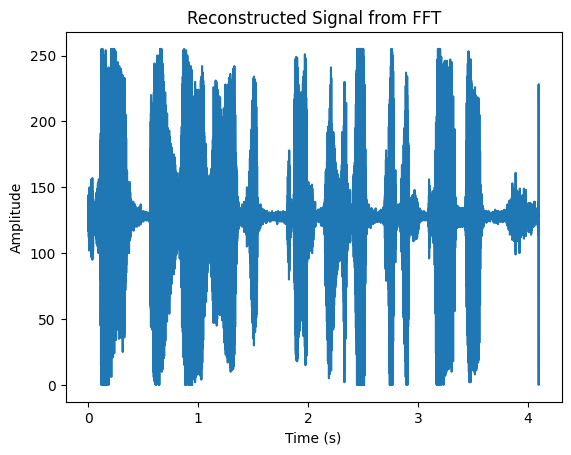

In [10]:
import numpy as np

fft_signal = np.fft.fft(audio_signal)
magnitude_spectrum_signal = np.abs(fft_signal)

frequencies = np.fft.fftfreq(len(fft_signal), d=1/sample_rate)

plt.figure()
plt.title("FFT of Speech Signal")
plt.plot(frequencies, magnitude_spectrum_signal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, sample_rate / 2 )
plt.show()

reconstructed_signal = np.fft.ifft(fft_signal)
reconstructed_signal = np.real(reconstructed_signal)

time_axis = np.linspace(0, len(reconstructed_signal) / sample_rate, num=len(reconstructed_signal))


plt.figure()
plt.title("Reconstructed Signal from FFT")
plt.plot(time_axis, reconstructed_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()